# Imports

In [272]:
# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle, Circle

# PyROOT imports
from ROOT import TTree, TFile

# SciKitHep imports
import uproot
import hist

# Numerical Imports
import numpy as np
import pandas as pd

# Setup plotting

In [273]:
plt.rcParams['figure.figsize'] = [10, 8]
font = {'family' : 'serif','weight' : 'normal','size'   : 22}
plt.rc('font', **font)

# Get data

#### List contents of file using pyroot

In [274]:
# path = '/Users/kcoliver-mallory/LZ/S2o_ML_MSci_students/3H.root'
path = '/Users/ruadhri/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4/Msci Project/Example Programmes/data/bg_sr1_fixed.root'
file = TFile.Open(path)
tree = file.Get('Events')

In [275]:
file.ls()

TFile**		/Users/ruadhri/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4/Msci Project/Example Programmes/data/bg_sr1_fixed.root	
 TFile*		/Users/ruadhri/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4/Msci Project/Example Programmes/data/bg_sr1_fixed.root	
  OBJ: TTree	Events	Events : 0 at: 0x2a6daf340
  KEY: TTree	Events;1	Events


In [276]:
for ii in range(tree.GetListOfBranches().GetEntries()):
    print(tree.GetListOfBranches()[ii].GetName())

runID
evtID
S2_area
S2_btm_area
S2_top_area
S2_TBA
S2_corrected_area
S2_XY_corrected_area
S2_width_ns
S2_peakAmp
S2_AFT_5
S2_AFT_10
S2_AFT_25
S2_AFT_50
S2_AFT_75
S2_AFT_90
S2_AFT_95
S2_rmsWidth_ns
S2_fwhm_ns
S2_x_cm
S2_y_cm
S2_xy_chiSq
S2_n_saturated
has_good_S1
drift_time
S1_area
S1_corrected_area
evt_total_area
evt_bad_area
evt_bad_e_area
evt_bad_ph_area
evt_bad_oth_area


#### Read data with uproot

In [277]:
# Read some or all branches into memory in an akward array

data = uproot.concatenate(f'{path}:Events',
                          #filter_name=['runID','evtID']
                         )
data.fields

['runID',
 'evtID',
 'S2_area',
 'S2_btm_area',
 'S2_top_area',
 'S2_TBA',
 'S2_corrected_area',
 'S2_XY_corrected_area',
 'S2_width_ns',
 'S2_peakAmp',
 'S2_AFT_5',
 'S2_AFT_10',
 'S2_AFT_25',
 'S2_AFT_50',
 'S2_AFT_75',
 'S2_AFT_90',
 'S2_AFT_95',
 'S2_rmsWidth_ns',
 'S2_fwhm_ns',
 'S2_x_cm',
 'S2_y_cm',
 'S2_xy_chiSq',
 'S2_n_saturated',
 'has_good_S1',
 'drift_time',
 'S1_area',
 'S1_corrected_area',
 'evt_total_area',
 'evt_bad_area',
 'evt_bad_e_area',
 'evt_bad_ph_area',
 'evt_bad_oth_area']

In [278]:
# Read in pointers to every TBranch of the TTree

data2 = uproot.open(f'{path}:Events')
#data2.keys()

# Read in 5000000 events at a time as arrays
for batch in data2.iterate(step_size=500000):
    #print(repr(batch))
    print(batch.evtID[0])

50002
66924
144688
70014


  Regular(1000, -40, 4000, underflow=False, overflow=False, name='S2_axis', label='S2_area'),
  Regular(1000, -800, 80000, underflow=False, overflow=False, name='S1_axis', label='S1_area'),
  storage=Double()) # Sum: 1359564.0


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x2b5afcd50>, cbar=<matplotlib.colorbar.Colorbar object at 0x2b49bb490>, text=[])

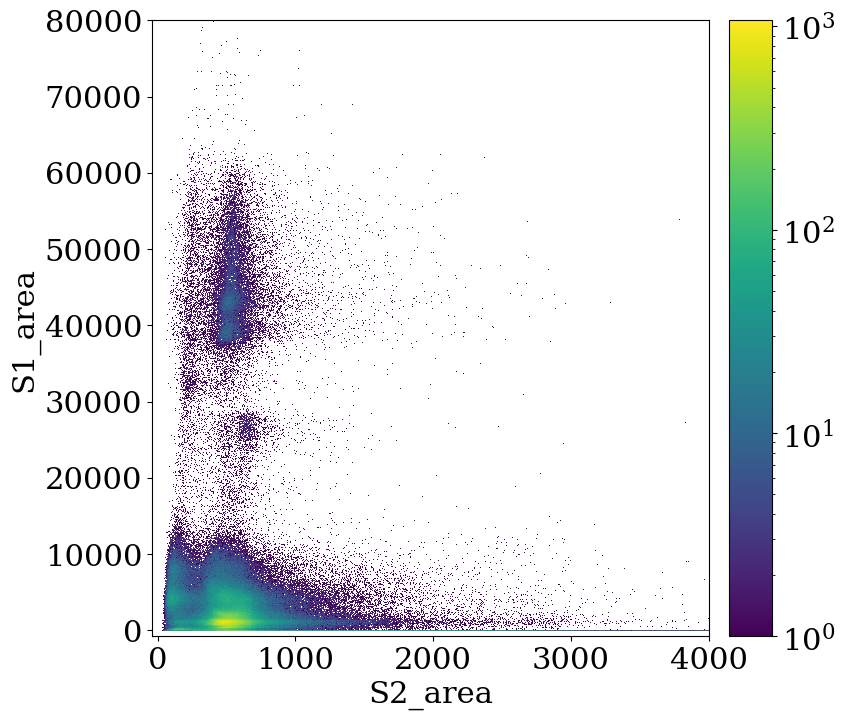

In [279]:
# Define some useful axes

# r_axis = hist.axis.Regular(1010,-1,100,name="r_axis",label="r",underflow=False,overflow=False)
# drift_axis = hist.axis.Regular(2000,-1000000,1000000,name="drift_axis",label="drift_time",underflow=False,overflow=False)

S2_axis = hist.axis.Regular(1000,-40,4000,name="S2_axis",label="S2_area",underflow=False,overflow=False)
S1_axis = hist.axis.Regular(1000,-800,80000,name="S1_axis",label="S1_area",underflow=False,overflow=False)

# s1_cut = ((5 < data.S2_area) & (data.S2_area < 200))

fig, ax = plt.subplots(figsize=(8,8))

S2S1_hist = hist.Hist(S2_axis, S1_axis)
S2S1_hist.fill(data.S2_area,data.S1_area)
S2S1_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

#ax.set(xlim=[-2500,3000],ylabel='Counts',yscale='log')
#ax.set(xlabel='Uncorrected S2 area [phd]',ylabel='Counts')

# Defining the radial cut

In [280]:
# initial S2 area cut for between 0 and 200

single_e_size = 47.07 # phd/electron


s1_area_cut = ((0 < data.S1_corrected_area) & (data.S1_corrected_area < 140))
s2_area_cut = ((5 < data.S2_corrected_area / single_e_size) & (data.S2_corrected_area / single_e_size < 500))
# s2_cut = ((35000 < data.S1_area) & (data.S1_area < 60000))
S1vsS2_cut = (s1_area_cut & s2_area_cut)# & fiducial_cut

# for ii in range(10):
#     print('%i\t%i'%(data.runID[cut][ii], data.evtID[cut][ii]))

  Regular(600, -60, 60, underflow=False, overflow=False, name='S2_x'),
  Regular(600, -60, 60, underflow=False, overflow=False, name='S2_y'),
  storage=Double()) # Sum: 37523.0


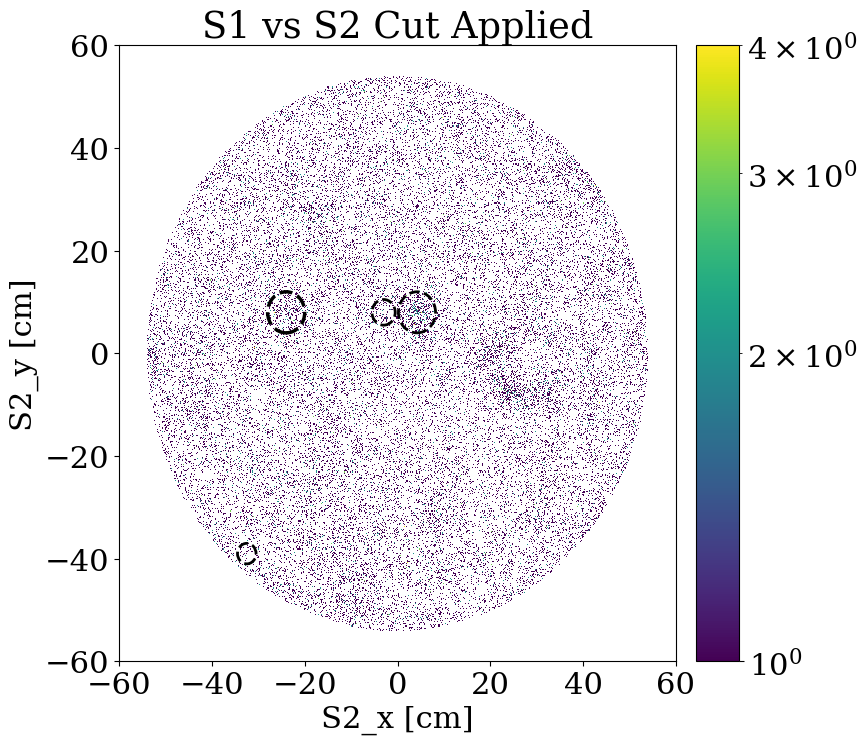

In [281]:
# looking into radial cuts initially in order to get rid of hotspot emission backgrounds
# a better way might be to look at the time events have taken place and remove based on that

S2_x_axis = hist.axis.Regular(600,-60,60,name="S2_x",label="S2_x",underflow=False,overflow=False)
S2_y_axis = hist.axis.Regular(600,-60,60,name="S2_y",label="S2_y",underflow=False,overflow=False)

fig, ax = plt.subplots(figsize=(8,8))

S1_area_hist = hist.Hist(S2_x_axis, S2_y_axis)
S1_area_hist.fill(data.S2_x_cm[S1vsS2_cut], data.S2_y_cm[S1vsS2_cut])
S1_area_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')
plt.title('S1 vs S2 Cut Applied')
ax.set(xlabel='S2_x [cm]',ylabel='S2_y [cm]')

h1_centre = (-24,8)
h1_r = 4
h2_centre = (-3,8)
h2_r = 2.5
h3_centre = (4.2,8)
h3_r = 4
h4_centre = (-32.5,-39)
h4_r = 2

hotspot1 = Circle(h1_centre,h1_r,fill=False,color='black',linewidth=2.5,linestyle='--')
hotspot2 = Circle(h2_centre,h2_r,fill=False,color='black',linewidth=2,linestyle='--')
hotspot3 = Circle(h3_centre,h3_r,fill=False,color='black',linewidth=2,linestyle='--')
hotspot4 = Circle(h4_centre,h4_r,fill=False,color='black',linewidth=2,linestyle='--')
#hotspot5 = Circle((19.5,0),2.5,fill=False,color='black',linewidth=2,linestyle='--')
ax.add_patch(hotspot1)
ax.add_patch(hotspot2)
ax.add_patch(hotspot3)
ax.add_patch(hotspot4)
#ax.add_patch(hotspot5)

  Regular(600, -60, 60, underflow=False, overflow=False, name='S2_x'),
  Regular(600, -60, 60, underflow=False, overflow=False, name='S2_y'),
  storage=Double()) # Sum: 86337.0


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x2bf612f50>, cbar=<matplotlib.colorbar.Colorbar object at 0x2b7998d50>, text=[])

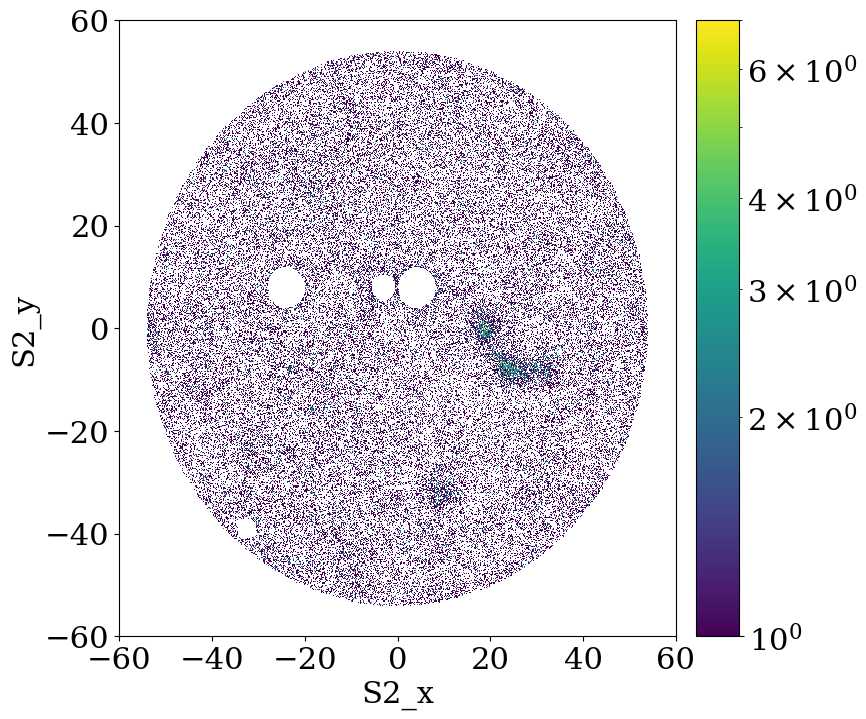

In [282]:
# Define some useful cuts

r1_cut = (((data.S2_x_cm-h1_centre[0])**2 + (data.S2_y_cm-h1_centre[1])**2)**0.5 > h1_r)
r2_cut = (((data.S2_x_cm-h2_centre[0])**2 + (data.S2_y_cm-h2_centre[1])**2)**0.5 > h2_r)
r3_cut = (((data.S2_x_cm-h3_centre[0])**2 + (data.S2_y_cm-h3_centre[1])**2)**0.5 > h3_r)
r4_cut = (((data.S2_x_cm-h4_centre[0])**2 + (data.S2_y_cm-h4_centre[1])**2)**0.5 > h4_r)
hotspot_cuts = (r1_cut & r2_cut & r3_cut & r4_cut)

# verify cuts are correct

# print(radial_cuts)

fig, ax = plt.subplots(figsize=(8,8))

S1_area_hist = hist.Hist(S2_x_axis, S2_y_axis)
S1_area_hist.fill(data.S2_x_cm[hotspot_cuts&s2_area_cut], data.S2_y_cm[hotspot_cuts&s2_area_cut])
S1_area_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

# Bad Area Plots

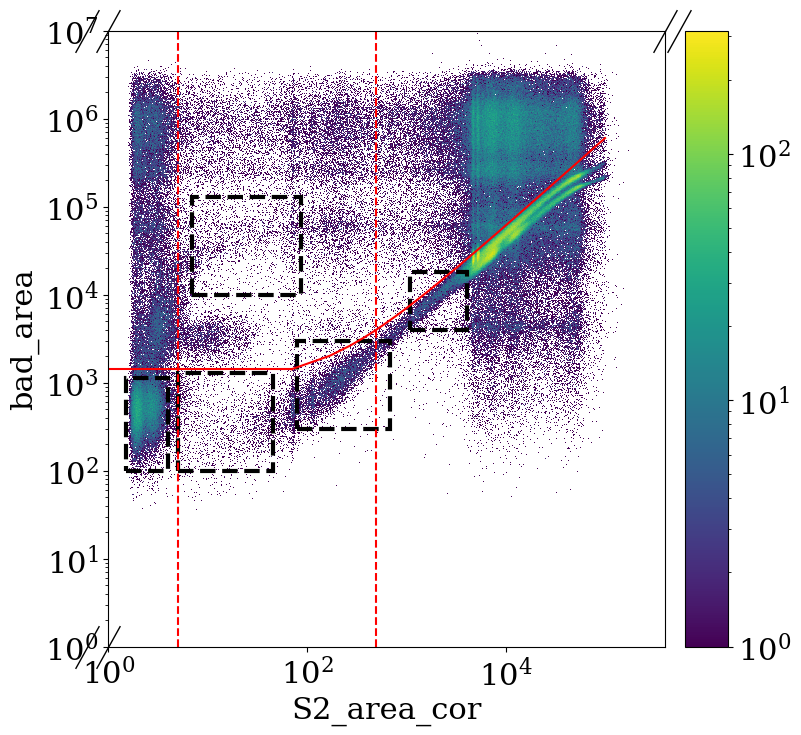

In [283]:
# Bad Area vs S2 Size

# S2o_area_corr_cut = (data.S1_area == -999)

S2_area_cor_axis = hist.axis.Regular(1000,1,400000,name="S2_corrected_area",label="S2_area_cor", transform=hist.axis.transform.log)
bad_area_axis = hist.axis.Regular(1000,1,10000000,name="bad_area",label="bad_area", transform=hist.axis.transform.log)

fig, ax = plt.subplots(figsize=(8,8))
S1_area_hist = hist.Hist(S2_area_cor_axis, bad_area_axis)
#S1_area_hist.fill(data.S2_corrected_area[S2o_area_corr_cut] / single_e_size, data.evt_bad_area[S2o_area_corr_cut])
S1_area_hist.fill(data.S2_corrected_area[hotspot_cuts] / single_e_size, data.evt_bad_area[hotspot_cuts])
S1_area_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

# print(data.S2_corrected_area[S2o_area_corr_cut])

ax.set(xscale='log', yscale='log')

line1_x = np.linspace(0, 70, 100)
line1_y = np.zeros(100)+6 * 70 + 1000#7*159.64285714285714+2.5
line2_x = np.zeros(100)+5
line2_y = np.logspace(0, 7, 100)
line3_x = np.zeros(100)+500
line3_y = np.logspace(0, 7, 100)
line4_x = np.linspace(70, 1e5, 1000)
line4_y = 6 * line4_x + 1000

badarea_cut1 = Rectangle((1.5, 100), 2.5, 1020, fill=False, color='black', linewidth=3, linestyle='--')
badarea_cut2 = Rectangle((5, 100), 40, 1200, fill=False, color='black', linewidth=3, linestyle='--')
badarea_cut3 = Rectangle((7, 10000), 80, 120000, fill=False, color='black', linewidth=3, linestyle='--')
badarea_cut4 = Rectangle((80, 300), 600, 2700, fill=False, color='black', linewidth=3, linestyle='--')
badarea_cut5 = Rectangle((1100, 4000), 3000, 14000, fill=False, color='black', linewidth=3, linestyle='--')
ax.add_patch(badarea_cut1)
ax.add_patch(badarea_cut2)
ax.add_patch(badarea_cut3)
ax.add_patch(badarea_cut4)
ax.add_patch(badarea_cut5)

plt.plot(line1_x, line1_y, color='red')
plt.plot(line2_x, line2_y, color='red', linestyle='--')
plt.plot(line3_x, line3_y, color='red', linestyle='--')
plt.plot(line4_x, line4_y, color='red')

13178
First bad area dense region

7055	50002
7055	50040
7055	50056
7055	50785
7055	50793
7055	51150
7055	51270
7055	51420
7055	51429
7055	51486

Second bad area dense region

7055	50325
6994	736
6994	1940
6981	141206
7066	120445
7066	120981
6978	117886
6978	118890
6978	118899
6978	119928

Third bad area dense region

6966	53858
6946	58838
6994	23
6994	195
6981	142436
7066	120619
7066	120985
6978	119816
7023	99980
7057	115489

Fourth bad area dense region

7055	50232
7055	51963
7055	52047
6966	52650
6966	53855
6966	53970
6946	57616
6946	57677
6946	59396
6946	59847

Fifth bad area dense region

7055	51248
7055	52087
6966	53068
6966	53075
6966	53545
6966	54453
6946	59750
6994	1690
6981	140684
6981	141911


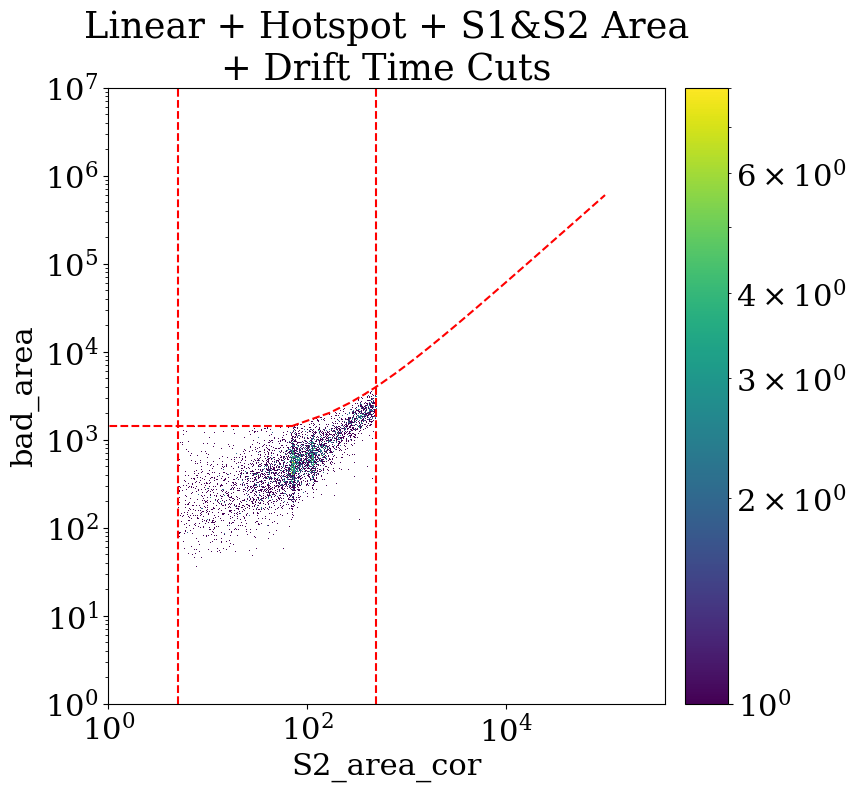

In [284]:
# making cuts
# (x < x_min) | (x > x_max)
# events within first dense area
se_s2_cor_area = data.S2_corrected_area / single_e_size
bad_rec_cut1 = (se_s2_cor_area < 1.5) | (se_s2_cor_area > 1.5+2.5) | (data.evt_bad_area < 100) | (data.evt_bad_area > 1020+100)
bad_rec_cut2 = (se_s2_cor_area < 5) | (se_s2_cor_area > 5+40) | (data.evt_bad_area < 100) | (data.evt_bad_area > 1200+100)
bad_rec_cut3 = (se_s2_cor_area < 7) | (se_s2_cor_area > 7+80) | (data.evt_bad_area < 10000) | (data.evt_bad_area > 10000+120000)
bad_rec_cut4 = (se_s2_cor_area < 80) | (se_s2_cor_area > 80+600) | (data.evt_bad_area < 300) | (data.evt_bad_area > 300+2700)
bad_rec_cut5 = (se_s2_cor_area < 1100) | (se_s2_cor_area > 1100+3000) | (data.evt_bad_area < 4000) | (data.evt_bad_area > 4000+14000)

str8_line_cut1 = ((data.evt_bad_area < 6 * 70 + 1000) & (se_s2_cor_area < 70))
str8_line_cut2 = ((data.evt_bad_area < 6 * se_s2_cor_area + 1000) & (se_s2_cor_area > 70))

gate_cut = (data.drift_time < 65000)
cathode_cut = (900000 < data.drift_time)
drift_cut = (gate_cut | cathode_cut)

all_rect_cuts = (str8_line_cut1|str8_line_cut2)&hotspot_cuts&S1vsS2_cut&drift_cut#&bad_rec_cut1&bad_rec_cut2&bad_rec_cut3&bad_rec_cut4&bad_rec_cut5

# all_cuts = radial_cuts&str8_line_cut2

print(len(data.S2_corrected_area[all_rect_cuts]))

fig, ax = plt.subplots(figsize=(8,8))
S1_area_hist = hist.Hist(S2_area_cor_axis, bad_area_axis)
S1_area_hist.fill(data.S2_corrected_area[all_rect_cuts] / single_e_size, data.evt_bad_area[all_rect_cuts])
S1_area_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')
ax.set(xscale='log', yscale='log')
plt.title('Linear + Hotspot + S1&S2 Area\n+ Drift Time Cuts')
plt.plot(line1_x, line1_y, color='red', linestyle='--')
plt.plot(line2_x, line2_y, color='red', linestyle='--')
plt.plot(line3_x, line3_y, color='red', linestyle='--')
plt.plot(line4_x, line4_y, color='red', linestyle='--')
# plt.savefig('badarea.svg')

# rectangle regions for scanning
bad_rec_scan1 = (se_s2_cor_area > 1.5) & (se_s2_cor_area < 1.5+2.5) & (data.evt_bad_area > 100) & (data.evt_bad_area < 1020+100)
bad_rec_scan2 = (se_s2_cor_area > 5) & (se_s2_cor_area < 5+40) & (data.evt_bad_area > 100) & (data.evt_bad_area < 1200+100)
bad_rec_scan3 = (se_s2_cor_area > 7) & (se_s2_cor_area < 7+80) & (data.evt_bad_area > 10000) & (data.evt_bad_area < 10000+120000)
bad_rec_scan4 = (se_s2_cor_area > 80) & (se_s2_cor_area < 80+600) & (data.evt_bad_area > 300) & (data.evt_bad_area < 300+2700)
bad_rec_scan5 = (se_s2_cor_area > 1100) & (se_s2_cor_area < 1100+3000) & (data.evt_bad_area > 4000) & (data.evt_bad_area < 4000+14000)

print('First bad area dense region\n')
for ii in range(10):
    print('%i\t%i'%(data.runID[bad_rec_scan1][ii], data.evtID[bad_rec_scan1][ii]))

print('\nSecond bad area dense region\n')
for ii in range(10):
    print('%i\t%i'%(data.runID[bad_rec_scan2][ii], data.evtID[bad_rec_scan2][ii]))

print('\nThird bad area dense region\n')
for ii in range(10):
    print('%i\t%i'%(data.runID[bad_rec_scan3][ii], data.evtID[bad_rec_scan3][ii]))

print('\nFourth bad area dense region\n')
for ii in range(10):
    print('%i\t%i'%(data.runID[bad_rec_scan4][ii], data.evtID[bad_rec_scan4][ii]))

print('\nFifth bad area dense region\n')
for ii in range(10):
    print('%i\t%i'%(data.runID[bad_rec_scan5][ii], data.evtID[bad_rec_scan5][ii]))

# Writing the complete training set to a csv

In [285]:
# Gate Data Set

ML_cut_gate = (str8_line_cut1|str8_line_cut2)&hotspot_cuts&S1vsS2_cut&gate_cut
data_dict = {
    'runID': data.runID[ML_cut_gate],
    'eventID': data.evtID[ML_cut_gate],
    'area': data.S2_corrected_area[ML_cut_gate],
    'max_pulse_height': data.S2_peakAmp[ML_cut_gate],
    'ext_elec': data.S2_corrected_area[ML_cut_gate]/single_e_size,
    'x' : data.S2_x_cm[ML_cut_gate],
    'y' : data.S2_y_cm[ML_cut_gate],
    'r' : np.sqrt((data.S2_x_cm[ML_cut_gate])**2 + (data.S2_y_cm[ML_cut_gate])**2),
    'S2_width' : data.S2_width_ns[ML_cut_gate]
}
df_gate = pd.DataFrame(data_dict)
df_gate['label'] = 1
df_gate['type'] = 'gate'
df_gate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11007 entries, 0 to 11006
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   runID             11007 non-null  int32  
 1   eventID           11007 non-null  int32  
 2   area              11007 non-null  float64
 3   max_pulse_height  11007 non-null  float64
 4   ext_elec          11007 non-null  float64
 5   x                 11007 non-null  float64
 6   y                 11007 non-null  float64
 7   r                 11007 non-null  float64
 8   S2_width          11007 non-null  float64
 9   label             11007 non-null  int64  
 10  type              11007 non-null  object 
dtypes: float64(7), int32(2), int64(1), object(1)
memory usage: 860.1+ KB


In [286]:
# Cathode Data Set

ML_cut_cathode = (str8_line_cut1|str8_line_cut2)&hotspot_cuts&S1vsS2_cut&cathode_cut
data_dict = {
    'runID': data.runID[ML_cut_cathode],
    'eventID': data.evtID[ML_cut_cathode],
    'area': data.S2_corrected_area[ML_cut_cathode],
    'max_pulse_height': data.S2_peakAmp[ML_cut_cathode],
    'ext_elec': data.S2_corrected_area[ML_cut_cathode]/single_e_size,
    'x' : data.S2_x_cm[ML_cut_cathode],
    'y' : data.S2_y_cm[ML_cut_cathode],
    'r' : np.sqrt((data.S2_x_cm[ML_cut_cathode])**2 + (data.S2_y_cm[ML_cut_cathode])**2),
    'S2_width' : data.S2_width_ns[ML_cut_cathode]
}
df_cathode = pd.DataFrame(data_dict)
df_cathode['label'] = 0
df_cathode['type'] = 'cathode'
df_cathode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   runID             2171 non-null   int32  
 1   eventID           2171 non-null   int32  
 2   area              2171 non-null   float64
 3   max_pulse_height  2171 non-null   float64
 4   ext_elec          2171 non-null   float64
 5   x                 2171 non-null   float64
 6   y                 2171 non-null   float64
 7   r                 2171 non-null   float64
 8   S2_width          2171 non-null   float64
 9   label             2171 non-null   int64  
 10  type              2171 non-null   object 
dtypes: float64(7), int32(2), int64(1), object(1)
memory usage: 169.7+ KB


In [287]:
# calculating the differences

# for the gate 
df_gate['dt10_05']=data.S2_AFT_10[ML_cut_gate]-data.S2_AFT_5[ML_cut_gate]
df_gate['dt25_10']=data.S2_AFT_25[ML_cut_gate]-data.S2_AFT_10[ML_cut_gate]
df_gate['dt50_25']=data.S2_AFT_50[ML_cut_gate]-data.S2_AFT_25[ML_cut_gate]
df_gate['dt75_50']=data.S2_AFT_75[ML_cut_gate]-data.S2_AFT_50[ML_cut_gate]
df_gate['dt90_75']=data.S2_AFT_90[ML_cut_gate]-data.S2_AFT_75[ML_cut_gate]
df_gate['dt95_90']=data.S2_AFT_95[ML_cut_gate]-data.S2_AFT_90[ML_cut_gate]
df_gate.info()

# for the cathode
df_cathode['dt10_05']=data.S2_AFT_10[ML_cut_cathode]-data.S2_AFT_5[ML_cut_cathode]
df_cathode['dt25_10']=data.S2_AFT_25[ML_cut_cathode]-data.S2_AFT_10[ML_cut_cathode]
df_cathode['dt50_25']=data.S2_AFT_50[ML_cut_cathode]-data.S2_AFT_25[ML_cut_cathode]
df_cathode['dt75_50']=data.S2_AFT_75[ML_cut_cathode]-data.S2_AFT_50[ML_cut_cathode]
df_cathode['dt90_75']=data.S2_AFT_90[ML_cut_cathode]-data.S2_AFT_75[ML_cut_cathode]
df_cathode['dt95_90']=data.S2_AFT_95[ML_cut_cathode]-data.S2_AFT_90[ML_cut_cathode]
df_cathode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11007 entries, 0 to 11006
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   runID             11007 non-null  int32  
 1   eventID           11007 non-null  int32  
 2   area              11007 non-null  float64
 3   max_pulse_height  11007 non-null  float64
 4   ext_elec          11007 non-null  float64
 5   x                 11007 non-null  float64
 6   y                 11007 non-null  float64
 7   r                 11007 non-null  float64
 8   S2_width          11007 non-null  float64
 9   label             11007 non-null  int64  
 10  type              11007 non-null  object 
 11  dt10_05           11007 non-null  float64
 12  dt25_10           11007 non-null  float64
 13  dt50_25           11007 non-null  float64
 14  dt75_50           11007 non-null  float64
 15  dt90_75           11007 non-null  float64
 16  dt95_90           11007 non-null  float6

In [288]:
# write to csv

df_cathode.columns = df_gate.columns
df_background = pd.concat([df_cathode, df_gate], ignore_index=True)
df_background.info()

df_background.to_csv('/Users/ruadhri/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4/Msci Project/Example Programmes/data/bg_sr1_vetoes.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13178 entries, 0 to 13177
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   runID             13178 non-null  int32  
 1   eventID           13178 non-null  int32  
 2   area              13178 non-null  float64
 3   max_pulse_height  13178 non-null  float64
 4   ext_elec          13178 non-null  float64
 5   x                 13178 non-null  float64
 6   y                 13178 non-null  float64
 7   r                 13178 non-null  float64
 8   S2_width          13178 non-null  float64
 9   label             13178 non-null  int64  
 10  type              13178 non-null  object 
 11  dt10_05           13178 non-null  float64
 12  dt25_10           13178 non-null  float64
 13  dt50_25           13178 non-null  float64
 14  dt75_50           13178 non-null  float64
 15  dt90_75           13178 non-null  float64
 16  dt95_90           13178 non-null  float6

13178


[Text(0, 0.5, 'Counts'), (0.0, 505.0), None]

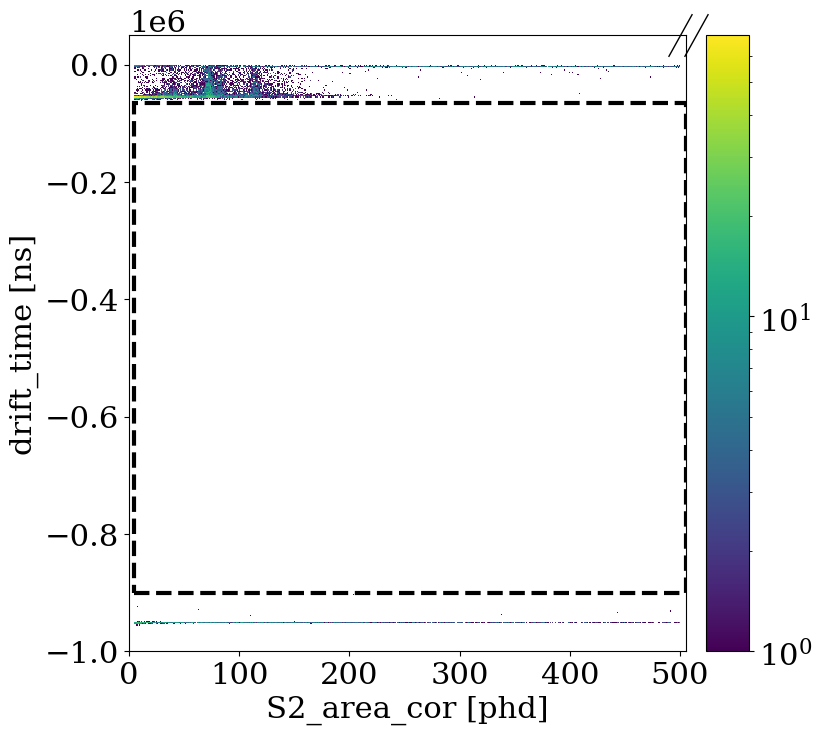

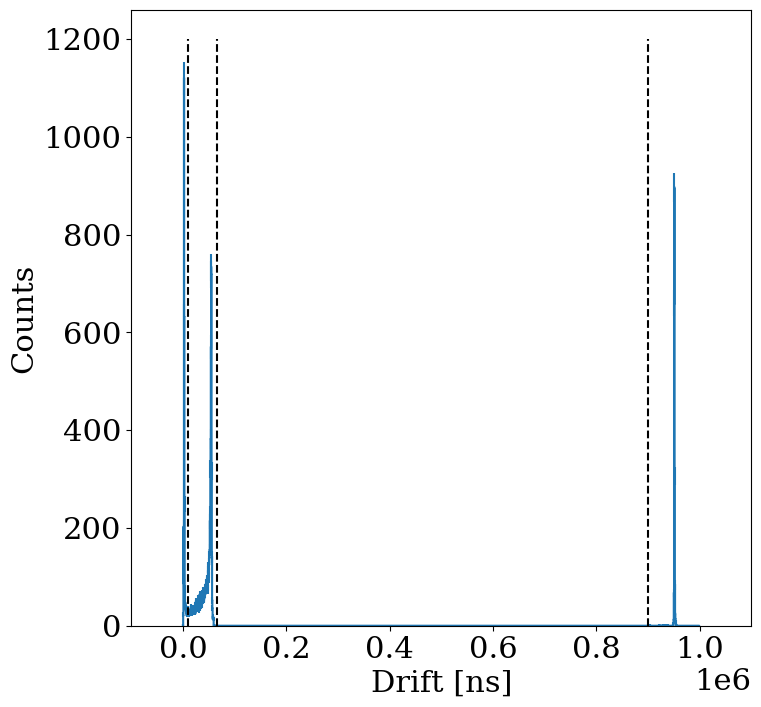

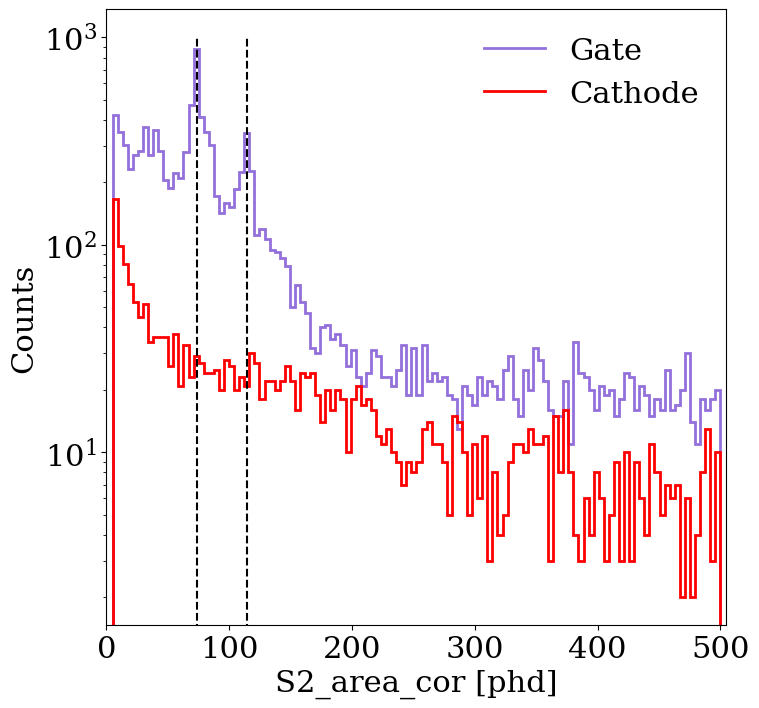

In [289]:
# check gate/cathode events

fig, ax = plt.subplots(figsize=(8,8))
S2_area_drift_axis = hist.axis.Regular(500,5,500,name="S2_corrected_area",label="S2_area_cor [phd]")
drift_axis = hist.axis.Regular(500,-1000000,100,name="drift_axis",label="drift_time [ns]",underflow=False,overflow=False)
S2_area_drift_hist = hist.Hist(S2_area_drift_axis, drift_axis)
S2_area_drift_hist.fill(se_s2_cor_area[all_rect_cuts], -1*data.drift_time[all_rect_cuts])
S2_area_drift_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')
ax.set(xlim=[0,505], ylim=[-1000000,50000])
drift_cut_rec1 = Rectangle((5,-900000),500,835000,fill=False,color='black',linewidth=3,linestyle='--')
ax.add_patch(drift_cut_rec1)

print(len(se_s2_cor_area[all_rect_cuts]))


# check 1D drift time hist for comparison
fig, ax = plt.subplots(figsize=(8,8))
drift_axis_1d = hist.axis.Regular(2000,-100,1000000,name="drift_axis",label="drift_time",underflow=False,overflow=False)
drift_hist_1d = hist.Hist(drift_axis_1d)
drift_hist_1d.fill(data.drift_time[all_rect_cuts])
drift_hist_1d.plot()
ax.set(xlabel='Drift [ns]',ylabel='Counts', xlim=[-0.1e6,1.1e6])
plt.plot(np.zeros(50)+65000, np.linspace(0,1200), linestyle='--', color='black')
plt.plot(np.zeros(50)+900000, np.linspace(0,1200), linestyle='--', color='black')
plt.plot(np.zeros(50)+10000, np.linspace(0,1200), linestyle='--', color='black')

# gate vs gas cut will be at 10000ns on the drift time
# leftmost peak is gate and second peak is gas

# check 1D S2 area hist for comparison
fig, ax = plt.subplots(figsize=(8,8))
#drift_axis_1d = hist.axis.Regular(2000,-100,1000000,name="drift_axis",label="drift_time",underflow=False,overflow=False)
S2_area_1d_axis = hist.axis.Regular(120,5,500,name="S2_corrected_area",label="S2_area_cor [phd]")
S2_hist_gate_1d = hist.Hist(S2_area_1d_axis)
S2_hist_gate_1d.fill(se_s2_cor_area[ML_cut_gate])
S2_hist_gate_1d.plot(color='mediumpurple',ls='-',lw=2,yerr=False,label='Gate',ax=ax)

S2_hist_cathode_1d = hist.Hist(S2_area_1d_axis)
S2_hist_cathode_1d.fill(se_s2_cor_area[ML_cut_cathode])
S2_hist_cathode_1d.plot(color='red',ls='-',lw=2,yerr=False,label='Cathode',ax=ax)
plt.plot(np.zeros(50)+73.5, np.linspace(0,1e3), linestyle='--', color='black')
plt.plot(np.zeros(50)+114.5, np.linspace(0,1e3), linestyle='--', color='black')

ax.legend(loc='upper right',frameon=False)
ax.set(ylabel='Counts', xlim=[0, 505], yscale='log')
# plt.plot(np.zeros(50)+65000, np.linspace(0,1200), linestyle='--', color='black')
# plt.plot(np.zeros(50)+900000, np.linspace(0,1200), linestyle='--', color='black')


  Regular(600, -60, 60, underflow=False, overflow=False, name='S2_x'),
  Regular(600, -60, 60, underflow=False, overflow=False, name='S2_y'),
  storage=Double()) # Sum: 11007.0
[51.2, 52.3, 35.3, 25.5, 22.1, 40.6, ..., 33.9, 17.8, 39.8, 37.4, 18.8, 17.4]


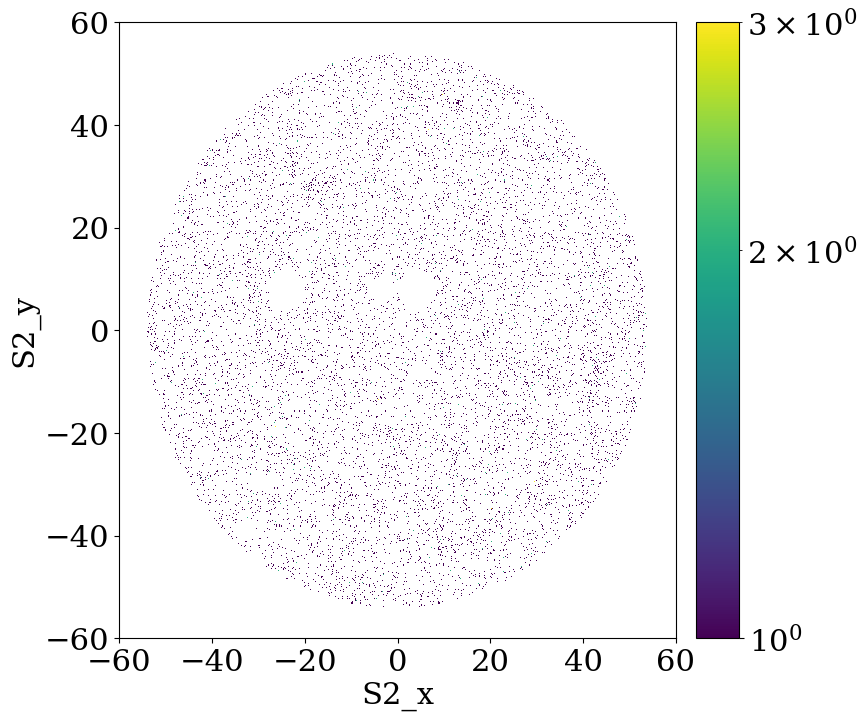

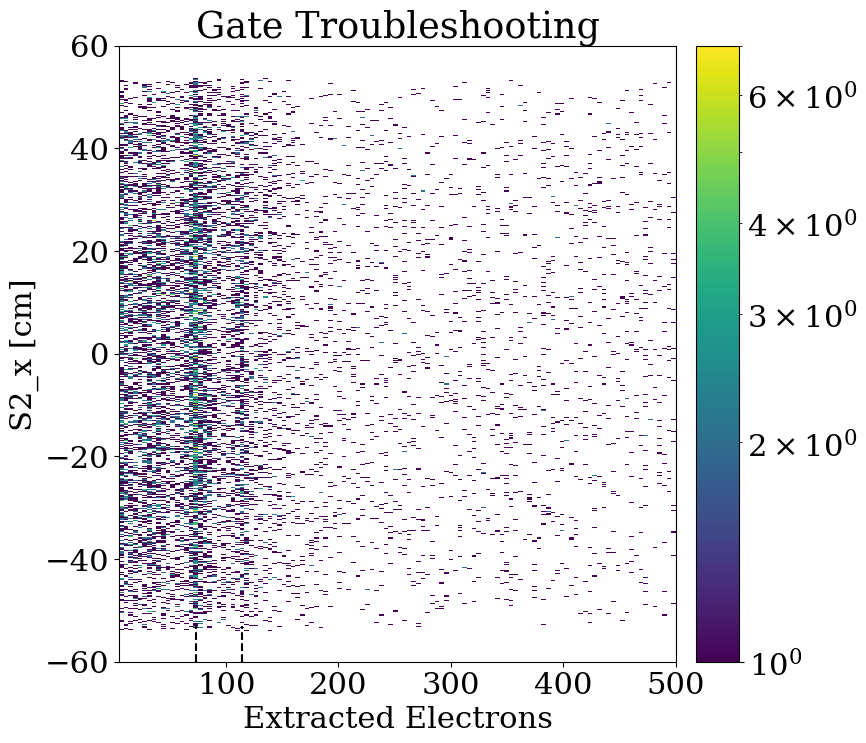

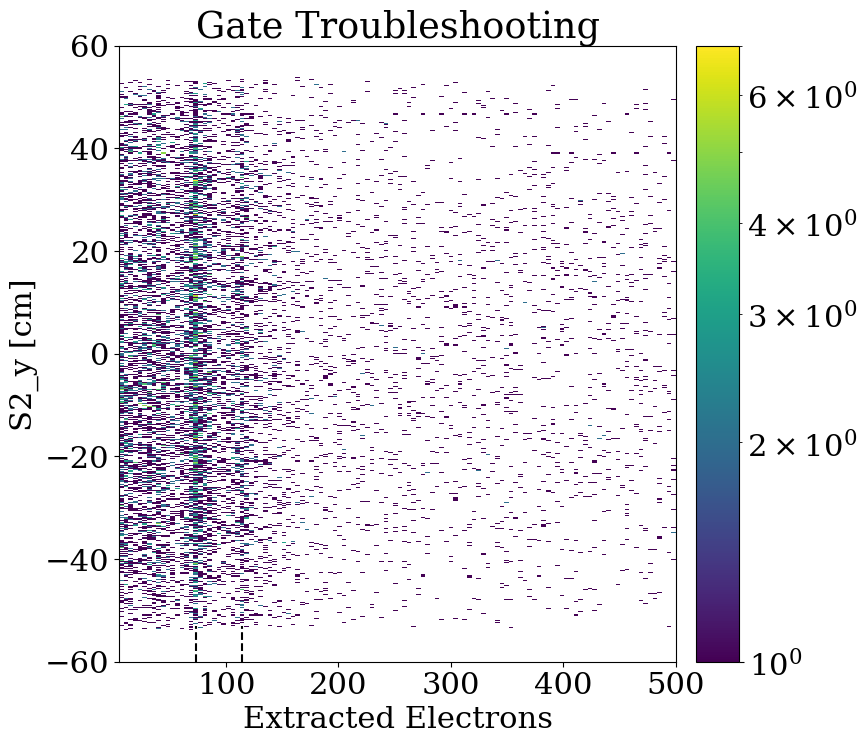

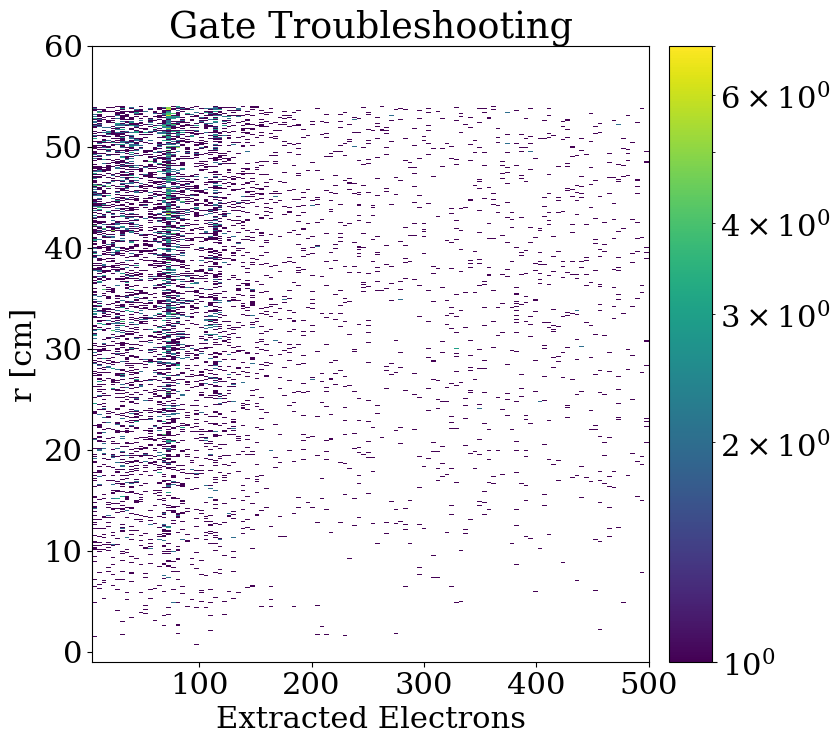

In [290]:
# Checking of the two weird peaks are hotspots

fig, ax = plt.subplots(figsize=(8,8))

S1_area_hist = hist.Hist(S2_x_axis, S2_y_axis)
S1_area_hist.fill(data.S2_x_cm[ML_cut_gate], data.S2_y_cm[ML_cut_gate])
S1_area_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

fig, ax = plt.subplots(figsize=(8,8))

S2_x_gate_hist = hist.Hist(S2_area_1d_axis, S2_x_axis)
# S2_x_gate_hist.fill(se_s2_cor_area[hotspot_cuts&s2_area_cut], data.S2_x_cm[hotspot_cuts&s2_area_cut])
S2_x_gate_hist.fill(se_s2_cor_area[ML_cut_gate], data.S2_x_cm[ML_cut_gate])
S2_x_gate_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')
plt.title('Gate Troubleshooting')
ax.set(xlabel='Extracted Electrons',ylabel='S2_x [cm]')
plt.plot(np.zeros(50)+73.5, np.linspace(-60,-53), linestyle='--', color='black')
plt.plot(np.zeros(50)+114.5, np.linspace(-60,-53), linestyle='--', color='black')

fig, ax = plt.subplots(figsize=(8,8))

S2_y_gate_hist = hist.Hist(S2_area_1d_axis, S2_y_axis)
# S2_y_gate_hist.fill(se_s2_cor_area[hotspot_cuts&s2_area_cut], data.S2_y_cm[hotspot_cuts&s2_area_cut])
S2_y_gate_hist.fill(se_s2_cor_area[ML_cut_gate], data.S2_y_cm[ML_cut_gate])
S2_y_gate_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')
plt.title('Gate Troubleshooting')
ax.set(xlabel='Extracted Electrons',ylabel='S2_y [cm]')
plt.plot(np.zeros(50)+73.5, np.linspace(-60,-53), linestyle='--', color='black')
plt.plot(np.zeros(50)+114.5, np.linspace(-60, -53), linestyle='--', color='black')

# Plotting radius instead of x and y separately

r_axis = hist.axis.Regular(1000,-1,60,name="r_axis",label="r",underflow=False,overflow=False)

fig, ax = plt.subplots(figsize=(8,8))

S2_r_gate_hist = hist.Hist(S2_area_1d_axis, r_axis)
# S2_y_gate_hist.fill(se_s2_cor_area[hotspot_cuts&s2_area_cut], data.S2_y_cm[hotspot_cuts&s2_area_cut])
S2_r_gate_hist.fill(se_s2_cor_area[ML_cut_gate], np.sqrt(data.S2_x_cm[ML_cut_gate]**2 + data.S2_y_cm[ML_cut_gate]**2))
S2_r_gate_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')
plt.title('Gate Troubleshooting')
ax.set(xlabel='Extracted Electrons',ylabel='r [cm]')
# plt.plot(np.zeros(50)+73.5, np.linspace(-60,-53), linestyle='--', color='black')
# plt.plot(np.zeros(50)+114.5, np.linspace(-60, -53), linestyle='--', color='black')

print(np.sqrt(data.S2_x_cm[ML_cut_gate]**2 + data.S2_y_cm[ML_cut_gate]**2))

# Writing new gate + gas background dataset

- Note that the signal types are labelled in the 'label' field as follows:
    - Cathode - 0
    - Gate - 1
    - Tritium - 2
    - Gas - 3

In [291]:
gate_only_drift_cut = (data.drift_time < 10000)
gas_only_drift_cut = ((data.drift_time >= 10000) & (data.drift_time < 65000))

# fig, ax = plt.subplots(figsize=(8,8))
# drift_axis_1d = hist.axis.Regular(2000,-100,1000000,name="drift_axis",label="drift_time",underflow=False,overflow=False)
# drift_hist_1d = hist.Hist(drift_axis_1d)
# drift_hist_1d.fill(data.drift_time[all_rect_cuts&gate_only_drift_cut])
# drift_hist_1d.plot()
# ax.set(xlabel='Drift [ns]',ylabel='Counts', xlim=[-0.1e6,1.1e6])
# plt.plot(np.zeros(50)+65000, np.linspace(0,1200), linestyle='--', color='black')
# plt.plot(np.zeros(50)+900000, np.linspace(0,1200), linestyle='--', color='black')
# plt.plot(np.zeros(50)+10000, np.linspace(0,1200), linestyle='--', color='black')

In [292]:
# Gas Only Data Set

ML_cut_gas_only = (str8_line_cut1|str8_line_cut2)&hotspot_cuts&S1vsS2_cut&gas_only_drift_cut
data_dict = {
    'runID': data.runID[ML_cut_gas_only],
    'eventID': data.evtID[ML_cut_gas_only],
    'area': data.S2_corrected_area[ML_cut_gas_only],
    'max_pulse_height': data.S2_peakAmp[ML_cut_gas_only],
    'ext_elec': data.S2_corrected_area[ML_cut_gas_only]/single_e_size,
    'x' : data.S2_x_cm[ML_cut_gas_only],
    'y' : data.S2_y_cm[ML_cut_gas_only],
    'r' : np.sqrt((data.S2_x_cm[ML_cut_gas_only])**2 + (data.S2_y_cm[ML_cut_gas_only])**2),
    'S2_width' : data.S2_width_ns[ML_cut_gas_only]
}
df_gas_only = pd.DataFrame(data_dict)
df_gas_only['label'] = 3
df_gas_only['type'] = 'gas'
df_gas_only.info()

# Gas Only Data Set

ML_cut_gate_only = (str8_line_cut1|str8_line_cut2)&hotspot_cuts&S1vsS2_cut&gate_only_drift_cut
data_dict = {
    'runID': data.runID[ML_cut_gate_only],
    'eventID': data.evtID[ML_cut_gate_only],
    'area': data.S2_corrected_area[ML_cut_gate_only],
    'max_pulse_height': data.S2_peakAmp[ML_cut_gate_only],
    'ext_elec': data.S2_corrected_area[ML_cut_gate_only]/single_e_size,
    'x' : data.S2_x_cm[ML_cut_gate_only],
    'y' : data.S2_y_cm[ML_cut_gate_only],
    'r' : np.sqrt((data.S2_x_cm[ML_cut_gate_only])**2 + (data.S2_y_cm[ML_cut_gate_only])**2),
    'S2_width' : data.S2_width_ns[ML_cut_gate_only]
}
df_gate_only = pd.DataFrame(data_dict)
df_gate_only['label'] = 1
df_gate_only['type'] = 'gate'
df_gate_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   runID             8217 non-null   int32  
 1   eventID           8217 non-null   int32  
 2   area              8217 non-null   float64
 3   max_pulse_height  8217 non-null   float64
 4   ext_elec          8217 non-null   float64
 5   x                 8217 non-null   float64
 6   y                 8217 non-null   float64
 7   r                 8217 non-null   float64
 8   S2_width          8217 non-null   float64
 9   label             8217 non-null   int64  
 10  type              8217 non-null   object 
dtypes: float64(7), int32(2), int64(1), object(1)
memory usage: 642.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ru

In [293]:
# Pulse Differences

# gas_only
df_gas_only['dt10_05']=data.S2_AFT_10[ML_cut_gas_only]-data.S2_AFT_5[ML_cut_gas_only]
df_gas_only['dt25_10']=data.S2_AFT_25[ML_cut_gas_only]-data.S2_AFT_10[ML_cut_gas_only]
df_gas_only['dt50_25']=data.S2_AFT_50[ML_cut_gas_only]-data.S2_AFT_25[ML_cut_gas_only]
df_gas_only['dt75_50']=data.S2_AFT_75[ML_cut_gas_only]-data.S2_AFT_50[ML_cut_gas_only]
df_gas_only['dt90_75']=data.S2_AFT_90[ML_cut_gas_only]-data.S2_AFT_75[ML_cut_gas_only]
df_gas_only['dt95_90']=data.S2_AFT_95[ML_cut_gas_only]-data.S2_AFT_90[ML_cut_gas_only]
df_gas_only.info()

# gate only

df_gate_only['dt10_05']=data.S2_AFT_10[ML_cut_gate_only]-data.S2_AFT_5[ML_cut_gate_only]
df_gate_only['dt25_10']=data.S2_AFT_25[ML_cut_gate_only]-data.S2_AFT_10[ML_cut_gate_only]
df_gate_only['dt50_25']=data.S2_AFT_50[ML_cut_gate_only]-data.S2_AFT_25[ML_cut_gate_only]
df_gate_only['dt75_50']=data.S2_AFT_75[ML_cut_gate_only]-data.S2_AFT_50[ML_cut_gate_only]
df_gate_only['dt90_75']=data.S2_AFT_90[ML_cut_gate_only]-data.S2_AFT_75[ML_cut_gate_only]
df_gate_only['dt95_90']=data.S2_AFT_95[ML_cut_gate_only]-data.S2_AFT_90[ML_cut_gate_only]
df_gate_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   runID             8217 non-null   int32  
 1   eventID           8217 non-null   int32  
 2   area              8217 non-null   float64
 3   max_pulse_height  8217 non-null   float64
 4   ext_elec          8217 non-null   float64
 5   x                 8217 non-null   float64
 6   y                 8217 non-null   float64
 7   r                 8217 non-null   float64
 8   S2_width          8217 non-null   float64
 9   label             8217 non-null   int64  
 10  type              8217 non-null   object 
 11  dt10_05           8217 non-null   float64
 12  dt25_10           8217 non-null   float64
 13  dt50_25           8217 non-null   float64
 14  dt75_50           8217 non-null   float64
 15  dt90_75           8217 non-null   float64
 16  dt95_90           8217 non-null   float64


In [294]:
# final writing to file

df_gate_only.columns = df_cathode.columns
df_gas_only.columns = df_cathode.columns
df_background_split = pd.concat([df_cathode, df_gate_only, df_gas_only], ignore_index=True)
df_background_split.info()

df_background_split.to_csv('/Users/ruadhri/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4/Msci Project/Example Programmes/data/bg_sr1_vetoes_gassplit.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13178 entries, 0 to 13177
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   runID             13178 non-null  int32  
 1   eventID           13178 non-null  int32  
 2   area              13178 non-null  float64
 3   max_pulse_height  13178 non-null  float64
 4   ext_elec          13178 non-null  float64
 5   x                 13178 non-null  float64
 6   y                 13178 non-null  float64
 7   r                 13178 non-null  float64
 8   S2_width          13178 non-null  float64
 9   label             13178 non-null  int64  
 10  type              13178 non-null  object 
 11  dt10_05           13178 non-null  float64
 12  dt25_10           13178 non-null  float64
 13  dt50_25           13178 non-null  float64
 14  dt75_50           13178 non-null  float64
 15  dt90_75           13178 non-null  float64
 16  dt95_90           13178 non-null  float6